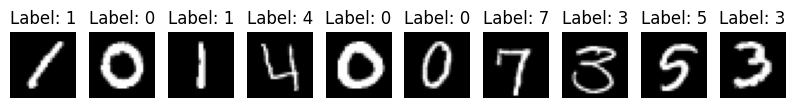

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

# Посмотрели, что находится в наших файлах
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Извлекли пиксельное значение из данных - т.е массив от 0 до 783 для каждого значения
pixels = train_data.loc[:, 'pixel0':'pixel783'].values
# Хотим получить первые 10 изображений
n = 10

images = pixels[:n].reshape(-1, 28, 28)

# Отображение изображений
fig, axes = plt.subplots(1, n, figsize=(10, 3))
for i in range(n):
    axes[i].imshow(images[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Label: {train_data.loc[i, 'label']}")
    
plt.show()

In [20]:
# Разделение данных на обучающий и проверочный наборы
train_images = train_data.loc[:, 'pixel0':'pixel783'].values
train_labels = train_data['label'].values

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2)

In [25]:
# иблиотека для открытия, изменения и сохранения множества различных форматов изображений.
from PIL import Image

# Reshape the image arrays
train_images_reshaped = train_images.reshape(-1, 28, 28)
val_images_reshaped = val_images.reshape(-1, 28, 28)

# Convert the image arrays to uint8 datatype
train_images_uint8 = train_images_reshaped.astype(np.uint8)
val_images_uint8 = val_images_reshaped.astype(np.uint8)

# Resize the images
width = 28
height = 28
train_images_resized = [Image.fromarray(image).resize((width, height)) for image in train_images_uint8]
val_images_resized = [Image.fromarray(image).resize((width, height)) for image in val_images_uint8]